# Read The Data

In [1]:
import pandas as pd
import random
from huggingface_hub import login
from datasets import Dataset, DatasetDict

In [2]:
DATA_PATH = '/kaggle/input/dictionary-of-english-words-and-definitions/dict.csv'

In [3]:
pd.set_option('display.max_colwidth', 200)



In [4]:
df = pd.read_csv(DATA_PATH)
df.tail()

,word,definition
42047,worm,"The word ""worm"" can refer to several related concepts:\n\n1. **General Definition**: A worm is a long, slender, soft-bodied invertebrate animal, typically with a cylindrical shape and no limbs. Th..."
42048,true,"The word ""true"" has several meanings in English:\n\n1. In the context of truth, ""true"" refers to something that is in accordance with fact or reality; it is accurate, genuine, or correct. For exam..."
42049,whip,"The word ""whip"" has several meanings in English, depending on the context:\n\n1. **Noun**:\n - A tool consisting of a flexible rod or cord used to strike or urge on an animal, often seen in farm..."
42050,work,"The word ""work"" has several meanings in English, depending on the context. Here are the primary definitions:\n\n1. **Noun**: \n - **General Activity**: Physical or mental effort directed toward ..."
42051,wing,"The word ""wing"" has several definitions in English, including:\n\n1. **Anatomy/Biology**: A wing is a feathered appendage found on birds and bats, used for flying. In insects, wings are membranous..."


In [5]:
df.shape

(42052, 2)

# EDA

In [6]:
df.isnull().sum()

word          2
definition    0
dtype: int64

In [7]:
df[df['word'].isna()]

,word,definition
24231,NaN,"The word ""nan"" can have several meanings, depending on the context:\n\n1. **Informal term for grandmother**: In British English, ""nan"" is a colloquial term for a grandmother, often used affectiona..."
24980,NaN,"The word ""null"" is an adjective that means having no value, effect, or significance; void or invalid. In a legal context, it refers to a contract or agreement that is invalid or without legal forc..."


Note that those are not actual null values. Otherwise, It is explination for the word 'Nan' in english.

In [8]:
df.duplicated().sum()

0

In [9]:
df[df['word'] == 'a']

,word,definition
13,a,"The word ""a"" is an indefinite article in English, used before a noun to indicate that the noun refers to a non-specific item or entity. It is typically used before singular nouns that begin with a..."
41281,a,"The word ""a"" is an indefinite article in English. It is used before a noun to refer to a non-specific item or to indicate that the noun is being mentioned for the first time. For example, in the s..."


# Frequency Distribution of Dataset
There are some words that is repeated 2 times and another is repeated 1 time as shown.

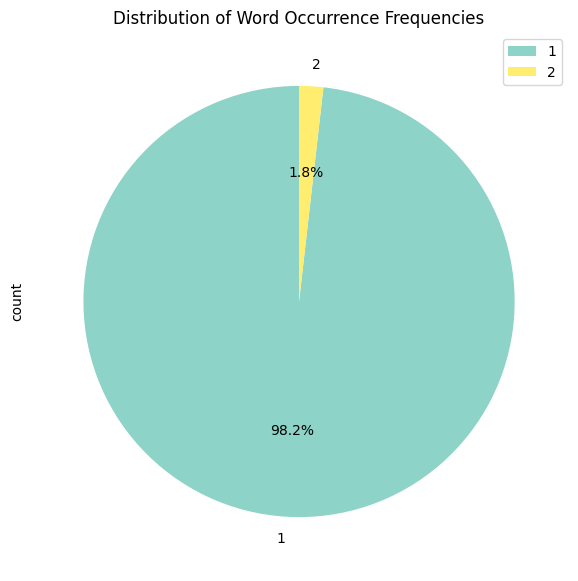

In [10]:
import matplotlib.pyplot as plt

# Get the value counts of word occurrences
word_value_counts = df['word'].value_counts()

# Get the frequency of the word frequencies (i.e., how many words appear a certain number of times)
word_frequency_distribution = word_value_counts.value_counts()

plt.figure(figsize=(7, 7))

word_frequency_distribution.plot.pie(
    autopct='%1.1f%%',          
    labels=word_frequency_distribution.index,  
    startangle=90,              
    cmap='Set3',               
    legend=True               
)

plt.title('Distribution of Word Occurrence Frequencies')
plt.show()


In [11]:
# Function to find improper characters
def find_improper_chars(text):
    import re
    # Define the allowed character pattern
    allowed_pattern = r'^[a-zA-Z0-9\s.,!?\'"()-]+$'
    # Find characters that do not match the allowed pattern
    return set(re.findall(r'[^a-zA-Z0-9\s.,!?\'"()-:;&%*\\/^]', text))

# Find improper characters in the 'definition' column
improper_chars_set = set()
for definition in df['definition'].dropna():
    improper_chars_set.update(find_improper_chars(definition))

print(improper_chars_set)


{'ü', 'ḳ', '–', 'ʒ', 'µ', 'н', 'ð', '✓', '言', 'Ὀ', '⁶', 'ँ', 'ώ', 'ξ', 'è', 'د', 'ל', 'η', 'ֵ', 'ń', 'द', 'و', 'κ', '−', 'í', 'д', '♥', 'र', 'þ', 'ø', '里', 'á', '₽', '子', '¨', 'п', '₅', '♯', 'ी', 'ा', 'ù', '한', '千', '⁹', 'ŋ', 'Ø', 'Φ', '@', 'Ζ', 'с', 'π', 'ּ', 'ö', 'ν', 'æ', 'ر', 'в', 'ų', 'é', '}', 'ṛ', 'ɔ', 'ī', 'ò', 'ñ', 'ı', 'ό', '₆', '₮', 'š', 'ó', 'δ', 'û', 'ω', 'ˈ', '¥', 'я', '→', '歌', 'Ξ', 'ː', 'р', 'Β', 'Λ', '¯', 'ɑ', 'Ν', '世', 'о', '毛', 'י', 'П', 'φ', 'Υ', 'ē', 'ρ', 'ण', 'ف', '’', '£', 'Ε', 'ة', 'ί', 'ě', 'ê', 'Ω', '食', 'ת', 'É', 'ú', '妈', '×', 'Γ', '†', 'م', 'λ', 'ǎ', 'ï', 'Θ', 'ι', 'и', '∞', 'ζ', 'ɪ', 'ς', ']', 'Á', 'з', 'ô', '。', '₂', 'ḥ', 'ō', 'ч', 'ə', '”', 'َ', '#', 'ć', '判', 'ו', '$', 'μ', '辞', '√', 'ā', 'і', 'Å', 'č', '∛', 'ο', 'а', '⁻', '断', '₉', '二', 'ʌ', '‘', 'î', 'υ', 'ज', 'İ', '和', 'ł', 'ق', '∩', 'ْ', 'प', 'м', 'Κ', 'ψ', 'ṣ', 'å', 'ʃ', 'β', '[', 'χ', '돌', '可', 'ŵ', 'σ', 'य', 'ь', '³', 'Ρ', 'л', 'ß', '=', 'ж', 'ë', '位', 'ا', '你', 'ג', '<', 'θ', 'ǫ', '捕', 'ἀ', 'â',

In [12]:
# Remove rows with improper characters
mask = df['definition'].str.match(r'^[a-zA-Z0-9\s.\$,!?\'"():;&%*\\/^-]+$')
cleaned_df = df[mask]
cleaned_df.shape

(40539, 2)

# Display the words that have been deleted
Note that some of them are scientific words

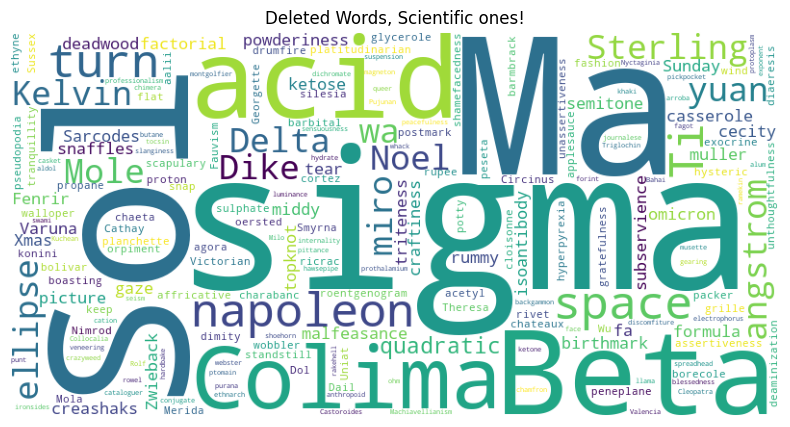

In [13]:
# (df[~mask]['word'].to_list())
from wordcloud import WordCloud
import matplotlib.pyplot as plt
random.seed(1234)
# Create a list of wordsrandom.seed(42)
words = df[~mask]['word'].to_list()
random.shuffle(words)

# Join words into a single string
text = ' '.join(words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # Turn off the axis
plt.title('Deleted Words, Scientific ones!')
plt.show()


In [14]:
cleaned_df

,word,definition
0,abbacy,"The word ""abbacy"" refers to the office or jurisdiction of an abbot, who is the head of a monastery. It denotes the period during which an abbot holds this position, as well as the responsibilities..."
1,abductor,"The word ""abductor"" refers to a person or thing that takes someone away by force or deceit. In a broader context, it can also refer to a muscle that moves a body part away from the midline of the ..."
2,abas,"The word ""abas"" does not have a widely recognized definition in English. However, ""abas"" is a term in Spanish that can refer to a type of fabric or can describe a style of clothing, often associat..."
3,abasement,"The word ""abasement"" refers to the action or effect of lowering someone in rank, office, prestige, or esteem. It often conveys a sense of humiliation or degradation, where an individual is brought..."
4,abampere,"The term ""abampere"" is a unit of electric current in the centimeter-gram-second (CGS) system of units. It is defined as the current that, when maintained in two straight parallel conductors of inf..."
...,...,...
42047,worm,"The word ""worm"" can refer to several related concepts:\n\n1. **General Definition**: A worm is a long, slender, soft-bodied invertebrate animal, typically with a cylindrical shape and no limbs. Th..."
42048,true,"The word ""true"" has several meanings in English:\n\n1. In the context of truth, ""true"" refers to something that is in accordance with fact or reality; it is accurate, genuine, or correct. For exam..."
42049,whip,"The word ""whip"" has several meanings in English, depending on the context:\n\n1. **Noun**:\n - A tool consisting of a flexible rod or cord used to strike or urge on an animal, often seen in farm..."
42050,work,"The word ""work"" has several meanings in English, depending on the context. Here are the primary definitions:\n\n1. **Noun**: \n - **General Activity**: Physical or mental effort directed toward ..."


In [15]:
# original (42052, 2)


# List of questions for the chatbot

In [16]:
# List of questions for the chatbot
questions = [
    "Hey, do you know what the word {vocab} means?",
    "Can you help me out? What does {vocab} mean?",
    "What’s the scoop on the word {vocab}?",
    "I stumbled upon {vocab} and I'm curious—what does it mean?",
    "Do you have any idea what {vocab} refers to?",
    "I came across {vocab}. What's it all about?",
    "Can you break down the meaning of {vocab} for me?",
    "What does {vocab} signify?",
    "I heard someone say {vocab}—what does that entail?",
    "What’s the definition of {vocab}?",
    "Do you know the meaning of the term {vocab}?",
    "What's the story behind the word {vocab}?",
    "Can you shed some light on what {vocab} means?",
    "I'm puzzled by {vocab}. Can you clarify?",
    "What does it mean when someone says {vocab}?",
    "Could you explain {vocab} to me?",
    "I'm curious—what's the meaning of {vocab}?",
    "Can you give me a rundown on the word {vocab}?",
    "What’s your take on the meaning of {vocab}?",
    "If I say {vocab}, what comes to your mind?",
    "What's the gist of {vocab}?",
    "Can you tell me more about the word {vocab}?",
    "What’s the essence of {vocab}?",
    "I'm trying to grasp the meaning of {vocab}—help me out?",
    "What do you think {vocab} means?",
    "Can you elaborate on {vocab}?",
    "I’d love to know what {vocab} means!",
    "Can you translate {vocab} into simpler terms?",
    "What’s the meaning of {vocab} in layman's terms?",
    "If I said {vocab}, what would you say it means?",
    "What does {vocab} encapsulate?",
    "Can you tell me the significance of {vocab}?",
    "I’m intrigued—what does {vocab} mean?",
    "Can you break {vocab} down into simple words?",
    "What’s the deal with the word {vocab}?",
    "How would you sum up {vocab}?",
    "What’s the core meaning of {vocab}?",
    "Do you know how to define {vocab}?",
    "Can you give me a sense of what {vocab} is?",
    "What’s the heart of {vocab}?",
    "How would you put {vocab} into context?",
    "What does {vocab} convey?",
    "Can you help me decode {vocab}?",
    "I’m lost—what’s the meaning of {vocab}?",
    "What does it mean to use the word {vocab}?",
    "Can you fill me in on the meaning of {vocab}?",
    "What’s the bottom line on {vocab}?",
    "How would you put it—what’s the meaning of {vocab}?",
    "Can you shed some insight on {vocab}?",
    "What’s the import of {vocab}?",
    "I heard {vocab} recently. What does it mean?",
    "Can you clarify what {vocab} stands for?",
    "What does the word {vocab} signify in a sentence?",
    "What's the significance of using {vocab}?",
    "How do you interpret the word {vocab}?",
    "Can you give me some background on {vocab}?",
    "What’s the meaning of {vocab} when used in conversation?",
    "How would you describe {vocab} to a friend?",
    "What does {vocab} entail, in your opinion?",
    "Can you explain what {vocab} means in a fun way?",
    "What’s the context behind {vocab}?",
    "Can you help me wrap my head around {vocab}?",
    "What are the implications of {vocab}?",
    "I need some clarity on {vocab}. What does it mean?",
    "What’s the nuance of the word {vocab}?",
    "How does {vocab} fit into everyday language?",
    "Can you give me an example of {vocab} in a sentence?",
    "What’s the origin of the word {vocab}?",
    "How is {vocab} commonly used?",
    "Can you differentiate {vocab} from similar words?",
    "What’s the relation of {vocab} to other concepts?",
    "How can I use {vocab} effectively in a conversation?",
    "Can you suggest synonyms for {vocab}?",
    "What’s the antonym of {vocab}?",
    "How does the meaning of {vocab} change in different contexts?",
    "What’s a memorable way to remember {vocab}?",
    "If someone used {vocab} incorrectly, how would you correct them?",
    "What questions might {vocab} prompt in a discussion?",
    "What makes {vocab} an interesting word?",
    "Can you tell me about the connotations of {vocab}?",
    "What might be the emotional impact of {vocab}?",
    "How would you summarize the meaning of {vocab}?",
    "What’s a common misconception about {vocab}?",
    "How does {vocab} relate to current events or trends?",
    "What’s a fun fact about the word {vocab}?",
    "Can you provide a historical perspective on {vocab}?",
    "What’s the best way to practice using {vocab}?",
    "How can I incorporate {vocab} into my writing?",
    "Can you suggest a creative way to use {vocab} in a sentence?",
    "What’s your favorite phrase that includes {vocab}?",
    "How does the pronunciation of {vocab} influence its meaning?",
    "Can you compare {vocab} with another word?",
    "What’s the linguistic family of {vocab}?",
    "How has the meaning of {vocab} evolved over time?",
    "What’s the funniest use of {vocab} you've heard?",
    "If {vocab} were a person, what would they be like?",
    "How would you explain {vocab} to a child?",
    "Can you use {vocab} in a joke?",
    "What’s your personal connection to the word {vocab}?",
    "What advice would you give someone learning about {vocab}?",
    "What’s the impact of {vocab} on communication?",
    "How would {vocab} change the tone of a conversation?",
    "What’s the relationship between {vocab} and culture?",
    "What’s your favorite memory associated with {vocab}?",
]


len(questions)

104

# Pretrained Model prompt template

We will transform the dataset into this template to be able to fine-tune the pretrained model on it.

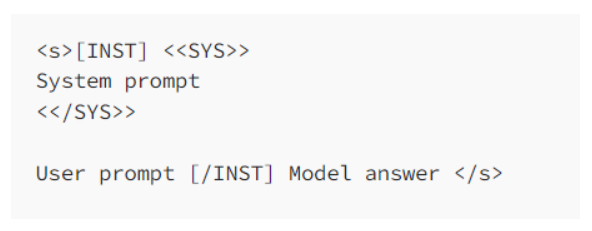

# Transform df into the desired template

In [17]:
def transform(row):
    vocab = row['word']
    random_index = random.randint(0, len(questions)-1)
    question = questions[random_index].format(vocab=vocab)
    answer = row['definition']
    prompt = '<s>[INST] {question} [/INST] {answer} </s>'.format(question=question, answer=answer)

    return prompt



In [18]:
transformed_df = cleaned_df.apply(transform, axis=1)

In [19]:
transformed_df.head()

0    <s>[INST] What’s the origin of the word abbacy? [/INST] The word "abbacy" refers to the office or jurisdiction of an abbot, who is the head of a monastery. It denotes the period during which an ab...
1    <s>[INST] How do you interpret the word abductor? [/INST] The word "abductor" refers to a person or thing that takes someone away by force or deceit. In a broader context, it can also refer to a m...
2    <s>[INST] How would you describe abas to a friend? [/INST] The word "abas" does not have a widely recognized definition in English. However, "abas" is a term in Spanish that can refer to a type of...
3    <s>[INST] What questions might abasement prompt in a discussion? [/INST] The word "abasement" refers to the action or effect of lowering someone in rank, office, prestige, or esteem. It often conv...
4    <s>[INST] How is abampere commonly used? [/INST] The term "abampere" is a unit of electric current in the centimeter-gram-second (CGS) system of units. It is defined as the cu

In [20]:
# see the first sample
transformed_df.iloc[0]

'<s>[INST] What’s the origin of the word abbacy? [/INST] The word "abbacy" refers to the office or jurisdiction of an abbot, who is the head of a monastery. It denotes the period during which an abbot holds this position, as well as the responsibilities and authority associated with the role. </s>'

In [21]:
# convert info df instead of series
transformed_df = pd.DataFrame(transformed_df)

In [22]:
# change column name:
transformed_df.columns = ['text']

In [23]:
transformed_df.head()

,text
0,"<s>[INST] What’s the origin of the word abbacy? [/INST] The word ""abbacy"" refers to the office or jurisdiction of an abbot, who is the head of a monastery. It denotes the period during which an ab..."
1,"<s>[INST] How do you interpret the word abductor? [/INST] The word ""abductor"" refers to a person or thing that takes someone away by force or deceit. In a broader context, it can also refer to a m..."
2,"<s>[INST] How would you describe abas to a friend? [/INST] The word ""abas"" does not have a widely recognized definition in English. However, ""abas"" is a term in Spanish that can refer to a type of..."
3,"<s>[INST] What questions might abasement prompt in a discussion? [/INST] The word ""abasement"" refers to the action or effect of lowering someone in rank, office, prestige, or esteem. It often conv..."
4,"<s>[INST] How is abampere commonly used? [/INST] The term ""abampere"" is a unit of electric current in the centimeter-gram-second (CGS) system of units. It is defined as the current that, when main..."


In [24]:
transformed_df.shape

(40539, 1)

# Save to csv file

In [25]:
random_sample = transformed_df.sample(n=500, random_state=42)  



In [26]:
split=200
random_sample = pd.concat([random_sample[:split], random_sample[-split:]], axis=0)
random_sample.shape

(400, 1)

In [27]:
random_sample.to_csv('dictionary_dataset.csv', index=False)

# Another transformation in question and answer form

In [28]:
def transform_q(q):
    random_index = random.randint(0, len(questions)-1)
    question = questions[random_index].format(vocab=q)
    return question

In [29]:

qna_vocab = pd.DataFrame()
qna_vocab['question'] = cleaned_df['word'].map(transform_q)
qna_vocab['answer'] = cleaned_df['definition']
qna_vocab.head()

,question,answer
0,What are the implications of abbacy?,"The word ""abbacy"" refers to the office or jurisdiction of an abbot, who is the head of a monastery. It denotes the period during which an abbot holds this position, as well as the responsibilities..."
1,How would you put it—what’s the meaning of abductor?,"The word ""abductor"" refers to a person or thing that takes someone away by force or deceit. In a broader context, it can also refer to a muscle that moves a body part away from the midline of the ..."
2,What’s the deal with the word abas?,"The word ""abas"" does not have a widely recognized definition in English. However, ""abas"" is a term in Spanish that can refer to a type of fabric or can describe a style of clothing, often associat..."
3,Can you fill me in on the meaning of abasement?,"The word ""abasement"" refers to the action or effect of lowering someone in rank, office, prestige, or esteem. It often conveys a sense of humiliation or degradation, where an individual is brought..."
4,I came across abampere. What's it all about?,"The term ""abampere"" is a unit of electric current in the centimeter-gram-second (CGS) system of units. It is defined as the current that, when maintained in two straight parallel conductors of inf..."


In [30]:
qna_vocab.shape


(40539, 2)

In [31]:
split=200
qna_vocab = pd.concat([qna_vocab[:split], qna_vocab[-split:]], axis=0)
qna_vocab.shape

(400, 2)

In [32]:
qna_vocab.to_csv('dictionary_dataset_qna.csv', index=False)